# Question 1

# Importing Required Libraries

In [1]:
import torch
from torchvision import datasets,transforms

# Loading the MNIST dataset
A transform function is also created in order to convert the PIL images present in the dataset (by default) to tensors for easier manipulation

In [2]:
transform = transforms.Compose([transforms.PILToTensor()]) # Transform definition to convert to Tensor from the default PIL Image

mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)

In [3]:
print(len(mnist_trainset)) # Just to check the size of the dataset

60000


In [4]:
type(mnist_trainset) # Checking the type of the dataset

torchvision.datasets.mnist.MNIST

# Creating a Subset of Random Indices with subset_size = 1000

In [5]:
# Creating a subset of subset_size
# torch.randperm randomizes the selection of these indices everytime the cell is executed
subset_size = 1000
indices = torch.randperm(len(mnist_trainset))[:subset_size]

subset = torch.utils.data.Subset(mnist_trainset, indices)

In [6]:
subset[1][0].size

(28, 28)

# Histogram for all classes (0-9) in MNIST Subset of 1000 samples

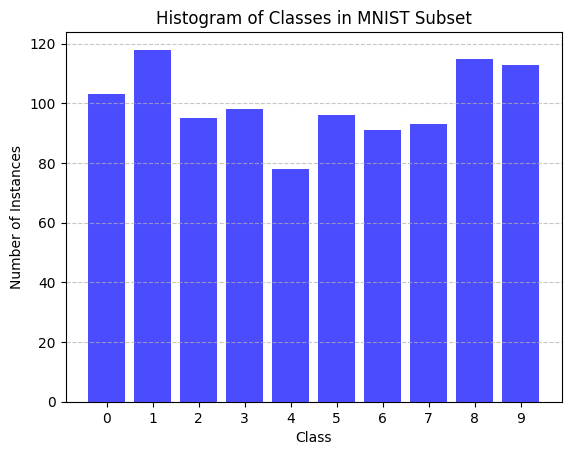

In [7]:
import matplotlib.pyplot as plt

# Extract labels from the subset
subset_labels = [subset[i][1] for i in range(len(subset))]

# Plotting the required parameters and labelling the plots
plt.hist(subset_labels, bins=range(11), align='left', rwidth=0.8, color='blue', alpha=0.7)
plt.title('Histogram of Classes in MNIST Subset')
plt.xlabel('Class')
plt.ylabel('Number of Instances')

plt.xticks(range(10), [str(i) for i in range(10)])  # Assuming MNIST has 10 classes (0-9)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Batching of the Subset using einops (rearrange)

In [8]:
from einops import rearrange

# Converting the PIL Images to tensors for easier manipulation
image_tensors = torch.stack([transform(image) for image, label in subset])

print(image_tensors.shape)
bs=25

# reshaping the tensor stack as required in the question
batches = rearrange(image_tensors, '(nb bs) c h w -> nb bs c h w',nb=int(subset_size/bs))
# batches = image_tensors.view(n_batches,batch_size,1,28,28) (alternate reshaping method)

batches.shape

torch.Size([1000, 1, 28, 28])


torch.Size([40, 25, 1, 28, 28])

# Random Selection of an Image in the subset and plotting pixel locations (x,y) vs Intensities (z)

/home/exouser/.conda/envs/me592/lib/python3.12/site-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /opt/conda/conda-bld/pytorch_1704987289929/work/aten/src/ATen/native/TensorShape.cpp:3549.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


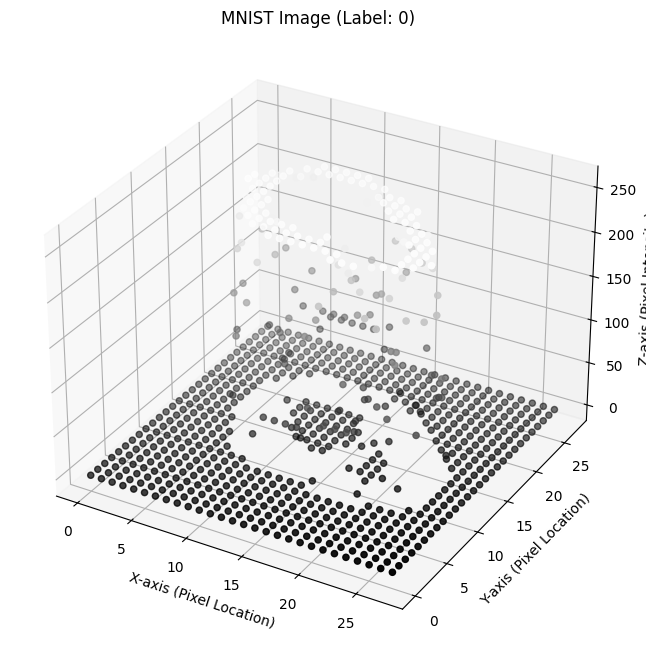

In [9]:
# Extract a random image from the original subset
randi = torch.randint(0,len(subset),(1,)).item()
image, label = subset[randi]
image = transform(image)

# Obtaining the x,y co-ordinates to go in the final plot (i.e.) pixel locations
# Reshaping it because it is a 2D array initially and intensities are 1D
pixel_locations = torch.stack(torch.meshgrid(torch.arange(image.shape[1]), torch.arange(image.shape[2])),dim=-1)
pixel_locations = pixel_locations.view(-1,2)

# Extracting Pixel Intensities
pixel_intensity = image.view(-1).numpy()

# Checking Shape of the Intensities List
# This is when I figured out that the intensities are a 1D array
pixel_locations.shape

# Plot the image in 3D and label axes
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pixel_locations[:, 0], pixel_locations[:, 1], pixel_intensity, c=pixel_intensity, cmap='gray')
ax.set_xlabel('X-axis (Pixel Location)')
ax.set_ylabel('Y-axis (Pixel Location)')
ax.set_zlabel('Z-axis (Pixel Intensity)')
ax.set_title(f'MNIST Image (Label: {label})')

plt.show()

# Question 2

# Loading the data into the workspace

In [10]:
import pandas as pd

df = pd.read_csv('energydata_complete.csv')

df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


# a) Plotting the Appliances Energy Consumption for the whole period

<function matplotlib.pyplot.show(close=None, block=None)>

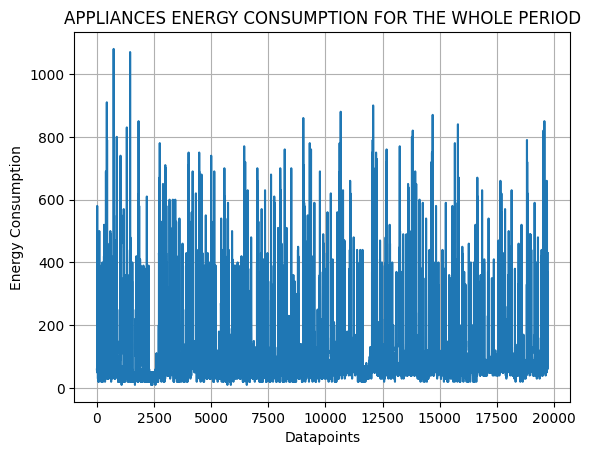

In [11]:
plt.plot(df.Appliances)
plt.xlabel('Datapoints')
plt.ylabel('Energy Consumption')

plt.title('APPLIANCES ENERGY CONSUMPTION FOR THE WHOLE PERIOD')

plt.grid(True)
plt.show

# b) Taking a closer look of the data for one week

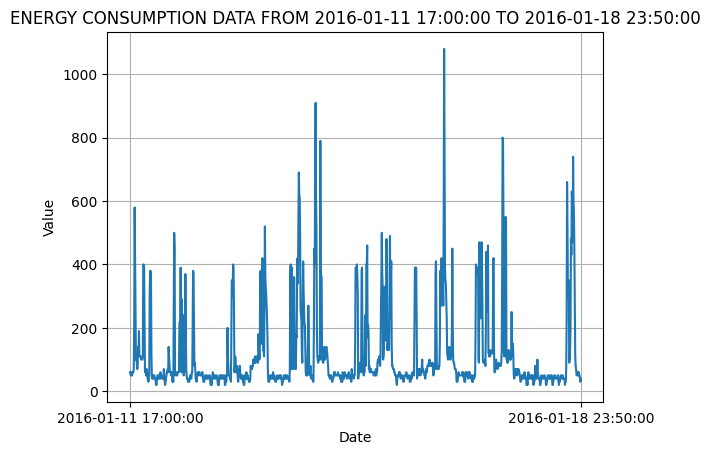

In [12]:
week_data = df[(df['date']>='2016-01-11') & (df['date']<='2016-01-19')]

# Extracting the first and last date from the data for later usage if required
first = week_data['date'].iloc[0]
last = week_data['date'].iloc[-1]

plt.plot(week_data['date'], week_data['Appliances'])
plt.title('ENERGY CONSUMPTION DATA FROM '+first+' TO '+last )

plt.xticks([first,last])

plt.xlabel('Date')
plt.ylabel('Value')

plt.grid(True)
plt.show()

# Heatmap of hourly consumption of appliances for the above week

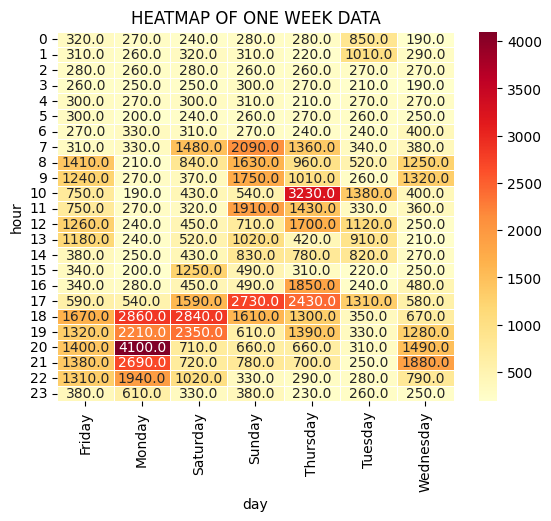

In [13]:
import seaborn as sns
from datetime import datetime as dt

# Copying the data to week_data_cp so as to retain the original week_data
# Changing the type of the 'date' column from string to in-built datetime type
week_data_cp = week_data.copy()
week_data_cp['date'] = pd.to_datetime(week_data['date'])

week_data_cp['hour'] = week_data_cp['date'].dt.hour
week_data_cp['day'] = week_data_cp['date'].dt.strftime('%A')

# Creating, drawing and labelling per hour energy consumption heat map for week_data
hmap = week_data_cp.pivot_table(values = 'Appliances', index = 'hour'  ,columns = 'day',aggfunc='sum')

sns.heatmap(hmap, cmap='YlOrRd', annot=True, fmt=".1f", linewidths=.5)

plt.title('HEATMAP OF ONE WEEK DATA')
plt.show()

# Histogram of Energy Consumption of appliances (with 100 bins)

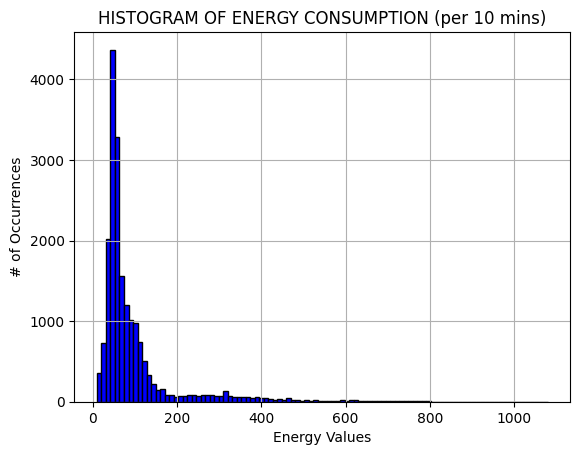

In [14]:
# Histogram of Energy Consumption of Appliances for the whole data (i.e.) df
plt.hist(df['Appliances'].values, bins = 100, color = 'blue', edgecolor = 'black')
plt.xlabel('Energy Values')
plt.ylabel('# of Occurrences')
plt.grid(True)
plt.title('HISTOGRAM OF ENERGY CONSUMPTION (per 10 mins)')
plt.show()

# Construction and Visualization of Energy Consumption vs NSM

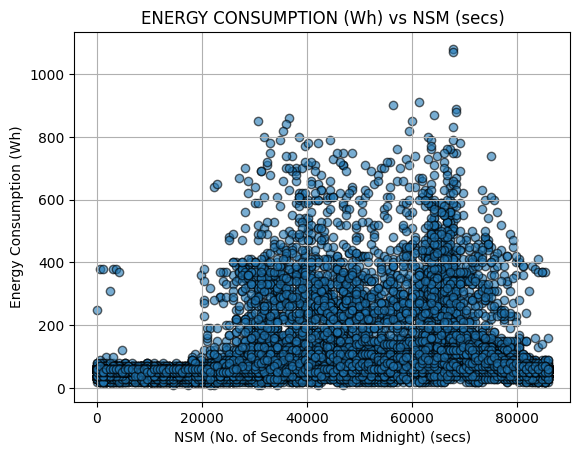

In [15]:
# Copying data in order to retain the original data
df_copy = df.copy()
df_copy['date'] = pd.to_datetime(df_copy['date'])

# Extracting hour, minutes and seconds from the date column for calculating
# NSM
df_copy['hour'] = df_copy['date'].dt.hour
df_copy['minutes'] = df_copy['date'].dt.minute
df_copy['secs'] = df_copy['date'].dt.second

# NSM Calculation
df_copy['NSM'] = df_copy['hour'] * 3600 + df_copy['minutes'] * 60 + df_copy['secs']

# Plotting the required parameters and labelling the graph
plt.scatter(df_copy['NSM'], df_copy['Appliances'], alpha=0.6, edgecolors='black')
plt.title('ENERGY CONSUMPTION (Wh) vs NSM (secs)')
plt.xlabel('NSM (No. of Seconds from Midnight) (secs)')
plt.ylabel('Energy Consumption (Wh)')
plt.grid(True)
plt.show()

# Energy Consumption vs Press_mm_Hg

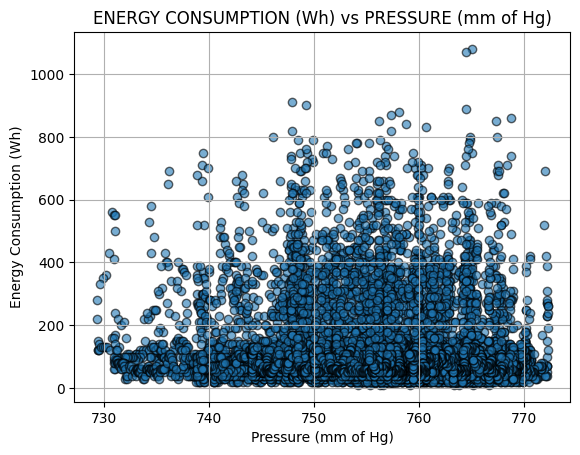

In [16]:
# Plotting the required parameters and labelling the axes
plt.scatter(df_copy['Press_mm_hg'],df_copy['Appliances'],alpha=0.6,edgecolors = 'black')
plt.title('ENERGY CONSUMPTION (Wh) vs PRESSURE (mm of Hg)')
plt.xlabel('Pressure (mm of Hg)')
plt.ylabel('Energy Consumption (Wh)')

plt.grid(True)
plt.show()

# Why are Press_mm_Hg and NSM the major contributing factors
These factors are major contributing factors because, most of the appliances (like lights, computers, etc) are usually switched off as the time is closer to midnight, which can be observed from the plot above. On the other hand, as Atmospheric Pressure, (denoted by Press_mm_Hg) in this dataset, increases it means that the temperature is also more, which means more airconditioning is required on warm days, which leads to more energy consumption. On the contrary, if the pressure is less, temperature is also less, which would lead to increased usage of heating appliances, which would cause a spike in the energy consumption as well. Thus, if the pressure is maintained, the temperature is also maintained and hence the energy consumption would be much lesser in comparison to days with extreme conditions.

# Question 3

# Loading the dataset into the Workspace

In [17]:
df_af = pd.read_csv('airfoil_self_noise.dat', delimiter='\t',header=None)

headings = ['Frequency (Hz)','Angle of attack (degrees)','Chord length (m)', 'Free-stream velocity (m/s)', 'Suction-side displacement thickness (dB)','Scaled sound pressure level (dB)']
df_af.columns = headings
df_af

,Frequency (Hz),Angle of attack (degrees),Chord length (m),Free-stream velocity (m/s),Suction-side displacement thickness (dB),Scaled sound pressure level (dB)
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


# Calculation and Compilation of all given Metrics
The values mentioned in the question are mean, variance, median, kurtosis, skewness and range of the various columns in the dataset. I have finally clubbed them into a **dataframe** so as to make it easier if we want to write the data to say a file.

In [18]:
import numpy as np
from scipy.stats import kurtosis, skew

# CALCULATING MEAN FOR VARIOUS PARAMETERS
mn_fr = np.mean(df_af['Frequency (Hz)'])
mn_aa = np.mean(df_af['Angle of attack (degrees)'])
mn_cl = np.mean(df_af['Chord length (m)'])
mn_fsv = np.mean(df_af['Free-stream velocity (m/s)'])
mn_ssdt = np.mean(df_af['Suction-side displacement thickness (dB)'])
mn_sspl = np.mean(df_af['Scaled sound pressure level (dB)'])
mean_valus = [mn_fr, mn_aa, mn_cl, mn_fsv, mn_ssdt, mn_sspl]
mean_vals = [round(x,2) for x in mean_valus]

# CALCULATING VARIANCE FOR VARIOUS PARAMETERS
var_fr = np.var(df_af['Frequency (Hz)'])
var_aa = np.var(df_af['Angle of attack (degrees)'])
var_cl = np.var(df_af['Chord length (m)'])
var_fsv = np.var(df_af['Free-stream velocity (m/s)'])
var_ssdt = np.var(df_af['Suction-side displacement thickness (dB)'])
var_sspl = np.var(df_af['Scaled sound pressure level (dB)'])
variance_valus = [var_fr, var_aa, var_cl, var_fsv, var_ssdt, var_sspl]
variance_vals = [round(x,2) for x in variance_valus]

# CALCULATING MEDIAN FOR VARIOUS PARAMETERS
md_fr = np.median(df_af['Frequency (Hz)'])
md_aa = np.median(df_af['Angle of attack (degrees)'])
md_cl = np.median(df_af['Chord length (m)'])
md_fsv = np.median(df_af['Free-stream velocity (m/s)'])
md_ssdt = np.median(df_af['Suction-side displacement thickness (dB)'])
md_sspl = np.median(df_af['Scaled sound pressure level (dB)'])
median_valus = [md_fr, md_aa, md_cl, md_fsv, md_ssdt, md_sspl]
median_vals = [round(x,2) for x in median_valus]

# CALCULATING KURTOSIS FOR VARIOUS PARAMETERS
kr_fr = kurtosis(df_af['Frequency (Hz)'])
kr_aa = kurtosis(df_af['Angle of attack (degrees)'])
kr_cl = kurtosis(df_af['Chord length (m)'])
kr_fsv = kurtosis(df_af['Free-stream velocity (m/s)'])
kr_ssdt = kurtosis(df_af['Suction-side displacement thickness (dB)'])
kr_sspl = kurtosis(df_af['Scaled sound pressure level (dB)'])
kurtosis_valus = [kr_fr, kr_aa, kr_cl, kr_fsv, kr_ssdt, kr_sspl]
kurtosis_vals = [round(x,2) for x in kurtosis_valus]

# CALCULATING SKEWNESS FOR VARIOUS PARAMETERS
sk_fr = skew(df_af['Frequency (Hz)'])
sk_aa = skew(df_af['Angle of attack (degrees)'])
sk_cl = skew(df_af['Chord length (m)'])
sk_fsv = skew(df_af['Free-stream velocity (m/s)'])
sk_ssdt = skew(df_af['Suction-side displacement thickness (dB)'])
sk_sspl = skew(df_af['Scaled sound pressure level (dB)'])
skew_valus = [sk_fr, sk_aa, sk_cl, sk_fsv, sk_ssdt, sk_sspl]
skew_vals = [round(x,2) for x in skew_valus]

# CALCULATING RANGE FOR VARIOUS PARAMETERS
rg_fr = np.ptp(df_af['Frequency (Hz)'])
rg_aa = np.ptp(df_af['Angle of attack (degrees)'])
rg_cl = np.ptp(df_af['Chord length (m)'])
rg_fsv = np.ptp(df_af['Free-stream velocity (m/s)'])
rg_ssdt = np.ptp(df_af['Suction-side displacement thickness (dB)'])
rg_sspl = np.ptp(df_af['Scaled sound pressure level (dB)'])
range_valus = [rg_fr, rg_aa, rg_cl, rg_fsv, rg_ssdt, rg_sspl]
range_vals = [round(x,1) for x in range_valus]

data = {
    'Mean': mean_vals,
    'Variance': variance_vals,
    'Median': median_vals,
    'Kurtosis': kurtosis_vals,
    'Skewness': skew_vals,
    'Range': range_vals
}

cols = headings
stat_data = pd.DataFrame(data, index=cols)

stat_data

,Mean,Variance,Median,Kurtosis,Skewness,Range
Frequency (Hz),2886.38,9932104.80,1600.00,5.69,2.13,19800.0
Angle of attack (degrees),6.78,35.00,5.40,-0.42,0.69,22.2
Chord length (m),0.14,0.01,0.10,-1.04,0.46,0.3
Free-stream velocity (m/s),50.86,242.35,39.60,-1.56,0.24,39.6
Suction-side displacement thickness (dB),0.01,0.00,0.00,2.21,1.70,0.1
Scaled sound pressure level (dB),124.84,47.56,125.72,-0.32,-0.42,37.6
